<a href="https://colab.research.google.com/github/fedemoss/HelmholtzCage/blob/main/Homogeneidad_en_volumen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**La idea de este código es estudiar la homogeneidad en cortes de distintos planos, y comprobar visualmente que podemos meter un cubesat con los parámetros elegidos de construcción**

In [ ]:
from scipy.integrate import quad
import numpy as np
from numpy import sqrt, sin, cos, pi
from matplotlib import pyplot as plt
import math 

u0 = 1.256637062*10**(-6) 
N = 40   # Número de vueltas
I = 1   # Corriente

**Escribimos las ecuaciones de campo para el par de bobinas circulares:**

In [ ]:
#BOBINAS CIRCULARES
def terminoDivisorup(u, z, x, y, r):
	return ((z + d/2)**2 + (x - r * cos(u))**2 + (y - r * sin(u))**2)**(3/2)

## termino para la bobina a -d/2 
def terminoDivisordown(u, z, x, y, r):
	return ((z - d/2)**2 + (x - r * cos(u))**2 + (y - r * sin(u))**2)**(3/2) 

##Bx para la bobina en + d/2
def dBxup(u, z, x, y, r):
	return 10**(-7) * r * N * I * (z + d/2) * cos(u)/terminoDivisorup(u, z, x, y, r)
 
##Bx para la bobina en -d/2
def dBxdown(u, z, x, y, r):
	return 10**(-7) * r * N * I * (z - d/2) * cos(u)/terminoDivisordown(u, z, x, y, r)

### lo mismo que Bx
def dByup(u, z, x, y, r):
	return 10**(-7) * r * N * I * (z + d/2) * sin(u)/terminoDivisorup(u, z, x, y, r)
 
def dBydown(u, z, x, y, r):
	return 10**(-7) * r * N * I * (z - d/2) * sin(u)/terminoDivisordown(u, z, x, y, r) 

def dBzup(u, z, x, y, r):
	return 10**(-7) * r * N * I * (r - x * cos(u) - y * sin(u)) / terminoDivisorup(u, z, x, y, r)

def dBzdown(u, z, x, y, r):
	return 10**(-7) * r * N * I * (r - x * cos(u) - y * sin(u)) / terminoDivisordown(u, z, x, y, r) 

**Para el par de bobinas cuadradas,  las ecuaciones de campo son las siguientes
:**

In [ ]:
#BOBINAS CUADRADAS

C = u0 * N * I / (4 * np.pi) #constante
##Bz Bobina a d/2

def SBz1up(z, x, y, l, d):
    factorcomun = (x + l / 2)/((x + l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz2up(z, x, y, l, d):
    factorcomun = (x - l / 2)/((x - l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz3up(z, x, y, l, d):
    factorcomun = (y + l / 2)/((y + l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((x - l /2) ** 2 + (y + l / 2) ** 2 + (z + d / 2) ** 2)     ## ojo acá
    derecha = (l / 2 + x) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz4up(z, x, y, l, d):
    factorcomun = (y - l / 2)/((y - l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((x - l /2) ** 2 + (y - l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y - l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBzup(z, x, y, l, d):
    return SBz1up(z, x, y, l, d) - SBz2up(z, x, y, l, d) + SBz3up(z, x, y, l, d) - SBz4up(z, x, y, l, d)

##Bz Bobina a -d/2

def SBz1down(z, x, y, l, d):
    factorcomun = (x + l / 2)/((x + l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz2down(z, x, y, l, d):
    factorcomun = (x - l / 2)/((x - l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz3down(z, x, y, l, d):
    factorcomun = (y + l / 2)/((y + l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((x - l /2) ** 2 + (y + l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz4down(z, x, y, l, d):
    factorcomun = (y - l / 2)/((y - l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((x - l /2) ** 2 + (y - l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y - l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBzdown(z, x, y, l, d):
    return SBz1down(z, x, y, l, d) - SBz2down(z, x, y, l, d) + SBz3down(z, x, y, l, d) - SBz4down(z, x, y, l, d)

## Campo en la componente x

def SBx1up(z, x, y, l, d):
    factorcomun = (z + d/2)/((x - l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBx2up(z, x, y, l, d):
    factorcomun = (z + d/2)/((x + l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBxup(z, x, y, l, d):
    return SBx1up(z, x, y, l, d) - SBx2up(z, x, y, l, d)

def SBx1down(z, x, y, l, d):
    factorcomun = (z - d/2)/((x - l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBx2down(z, x, y, l, d):
    factorcomun = (z - d/2)/((x + l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBxdown(z, x, y, l, d):
    return SBx1down(z, x, y, l, d) - SBx2down(z, x, y, l, d)

## Campo en la componente y

def SBy1up(z, x, y, l, d):
    factorcomun = (z + d/2)/((y - l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y - l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBy2up(z, x, y, l, d):
    factorcomun = (z + d/2)/((y + l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((y + l /2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SByup(z, x, y, l, d):
    return SBy1up(z, x, y, l, d) - SBy2up(z, x, y, l, d)

def SBy1down(z, x, y, l, d):
    factorcomun = (z - d/2)/((y - l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y - l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBy2down(z, x, y, l, d):
    factorcomun = (z - d/2)/((y + l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((y + l /2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBydown(z, x, y, l, d):
    return SBy1down(z, x, y, l, d) - SBy2down(z, x, y, l, d)

**REGION DE HOMOGENEIDAD A 1000PPM DE BOBINAS CIRCULARES**

In [ ]:
#BOBINAS CIRCULARES: CALCULO DE LA REGIÓN DE HOMOGENEIDAD
r = 0.45 #radio [m]
d = r #distancia de separación entre bobinas

x = np.linspace(-r/2, r/2, 31) #hacemos barridos en x, y, z
y = np.linspace(-r/2, r/2, 31)
z = np.linspace(-r/2, r/2, 31)
Bx = np.zeros((len(x),len(y),len(z))) #inicializamos el campo
By = np.zeros((len(x),len(y),len(z)))
Bz = np.zeros((len(x),len(y),len(z)))
H = np.zeros((len(x),len(y),len(z))) #inicializamos la Homogeneidad

restriccion = 1000 # Nuestra restricción de homogeneidad en ppm

# integral numérica en cuadraturas para los campos en el centro     
Lz0 = quad(dBzup, 0, 2 * np.pi, args=(0, 0, 0, r)) + quad(dBzdown, 0, 2*np.pi, args=(0, 0, 0, r))
Ly0 = quad(dByup, 0, 2 * np.pi, args=(0, 0, 0, r)) + quad(dBydown, 0, 2*np.pi, args=(0, 0, 0, r))
Lx0 = quad(dBxup, 0, 2 * np.pi, args=(0, 0, 0, r)) + quad(dBxdown, 0, 2*np.pi, args=(0, 0, 0, r))
#Campos en el centro de la configuracion 
Bz0 = (Lz0[2] + Lz0[0]) * 10 ** 6
Bx0 = (Lx0[2] + Lx0[0]) * 10 ** 6
By0 = (Ly0[2] + Ly0[0]) * 10 ** 6 
absB0 = np.sqrt(Bx0 ** 2 + By0 ** 2 + Bz0 ** 2)


# Loop en el que integramos usando cuadraturas los términos definidos arriba
for k in range(len(z)):
  for j in range(len(y)):
    for i in range(len(x)):
## integral numérica en cuadraturas para los campos en el centro 
      Lx = quad(dBxup, 0, 2*np.pi, args=(z[k], x[i], y[j],r)) + quad(dBxdown, 0, 2*np.pi, args=(z[k], x[i], y[j],r))
      Bx[i][j][k] = (Lx[0] + Lx[2])*10**6 
      Ly = quad(dByup,0,2*np.pi,args=(z[k],x[i],y[j],r)) + quad(dBydown,0,2*np.pi,args=(z[k],x[i],y[j],r)) 
      By[i][j][k] = (Ly[0] + Ly[2])*10**6
      Lz = quad(dBzup,0,2*np.pi,args=(z[k],x[i],y[j],r)) + quad(dBzdown,0,2*np.pi,args=(z[k],x[i],y[j],r))
      Bz[i][j][k] = (Lz[0] + Lz[2])*10**6 
##chequeamos si se cumple o no la restricción H<1000ppm
      if np.sqrt((Bx[i][j][k] - Bx0) ** 2 + (By[i][j][k] - By0) ** 2 + (Bz[i][j][k] - Bz0) ** 2) <= ((10 ** (-6)) * absB0 * restriccion):
        H[i][j][k] = 1 #si se cumple, le asigno un valor +1 a H
      else:
        H[i][j][k] = math.nan  #si no se cumple, le asigno un valor NaN a H
      

**GRAFICOS EN Z=0 & Y=0 DE LA HOMOGENEIDAD PARA LAS BOBINAS CIRCULARES**

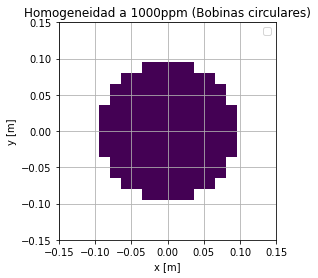

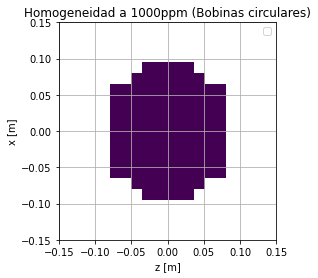

In [ ]:
#ploteo de la homogeneidad en xy y xz para el par de bobinas circulares
plt.figure(1)
plt.imshow(H[:,:,15], extent = [-r/2 , r/2, -r/2 , r/2])
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.xlim(-0.15,0.15)
plt.ylim(-0.15,0.15)
plt.grid()
plt.title('Homogeneidad a 1000ppm (Bobinas circulares)')
plt.legend(['Region en donde se cumple la restriccion'])

plt.figure(2)
plt.imshow(H[:,15,:], extent = [-r/2 , r/2, -r/2 , r/2])
plt.ylabel('x [m]')
plt.xlabel('z [m]')
plt.xlim(-0.15,0.15)
plt.ylim(-0.15,0.15)
plt.grid()
plt.title('Homogeneidad a 1000ppm (Bobinas circulares)')
plt.legend(['Region en donde se cumple la restriccion'])

plt.show()


**REGION DE HOMOGENEIDAD A 1000PPM DE BOBINAS CUADRADAS**

In [ ]:
#BOBINAS CUADRADAS: CALCULO DE LA REGIÓN DE HOMOGENEIDAD
l = 0.9 #lado  [m]
d = 0.5445 * l # distancia de separación entre bobinas ideal

x = np.linspace(-d/2, d/2, 31) #barridos espaciales en x,y,z
y = np.linspace(-d/2, d/2, 31)
z = np.linspace(-d/2, d/2, 31)
Bx = np.zeros((len(x),len(y),len(z))) #inicializamos el campo
By = np.zeros((len(x),len(y),len(z)))
Bz = np.zeros((len(x),len(y),len(z)))
Hsquare = np.zeros((len(x),len(y),len(z))) #inicializamos la homogeneidad

restriccion = 1000 #ppm

#Campos en el centro de la configuracion      
Bz0 = SBzdown(0, 0, 0, l, d) + SBzup(0, 0, 0, l, d)
Bx0 = SBxdown(0, 0, 0, l, d) + SBxup(0, 0, 0, l, d)
By0 = SBydown(0, 0, 0, l, d) + SByup(0, 0, 0, l, d)
absB0 = np.sqrt(Bx0 ** 2 + By0 ** 2 + Bz0 ** 2) #modulo del campo


#Loop en el que calculamos el campo y la homogeneidad en cada punto x,y,z
for k in range(len(z)):
  for j in range(len(y)):
    for i in range(len(x)):
      Bx[i][j][k] = SBxdown(z[k], x[i], y[j], l, d) + SBxup(z[k], x[i], y[j], l, d)
      By[i][j][k] = SBydown(z[k], x[i], y[j], l, d) + SByup(z[k], x[i], y[j], l, d)
      Bz[i][j][k] = SBzdown(z[k], x[i], y[j], l, d) + SBzup(z[k], x[i], y[j], l, d)
#chequeamos si se cumple o no que H<1000ppm
      if np.sqrt((Bx[i][j][k] - Bx0) ** 2 + (By[i][j][k] - By0) ** 2 + (Bz[i][j][k] - Bz0) ** 2) <= ((10 ** (-6)) * absB0 * restriccion):
        Hsquare[i][j][k] = 1 #si se cumple, le asigno un valor +1 a H
      else:
        Hsquare[i][j][k] = math.nan #si no se cumple, le asigno un valor NaN a H


**GRAFICOS EN Z=0 & Y=0 DE LA HOMOGENEIDAD PARA LAS BOBINAS CUADRADAS**

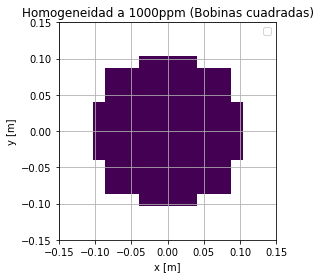

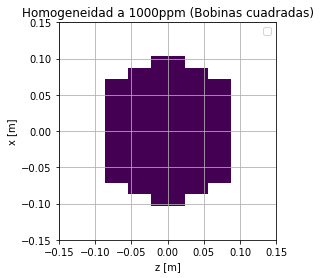

In [ ]:
#ploteo de la homogeneidad en xy y xz para el par de bobinas cuadradas
plt.figure(1)
plt.imshow(Hsquare[:,:,15], extent = [-d/2 , d/2, -d/2 , d/2])
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.xlim(-0.15, 0.15)
plt.ylim(-0.15, 0.15)
plt.grid()
plt.title('Homogeneidad a 1000ppm (Bobinas cuadradas)')
plt.legend('Region en donde se cumple la restriccion')

plt.figure(2)
plt.imshow(Hsquare[:,15,:], extent = [-d/2 , d/2, -d/2 , d/2])
plt.xlabel('z [m]')
plt.ylabel('x [m]')
plt.xlim(-0.15, 0.15)
plt.ylim(-0.15, 0.15)
plt.grid()
plt.title('Homogeneidad a 1000ppm (Bobinas cuadradas)')
plt.legend(['Region en donde se cumple la restriccion'])

plt.show()

**GRAFICOS COMPARATIVOS DE REGIONES DE HOMOGENEIDAD**

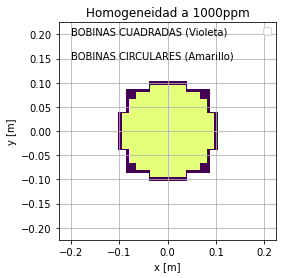

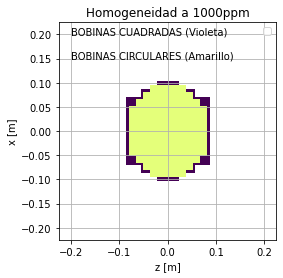

In [ ]:
#COMPARISON OF REGIONS
plt.figure(1)
plt.imshow(Hsquare[:,:,15], extent = [-d/2 , d/2, -d/2 , d/2], cmap='viridis')
plt.imshow(H[:,:,15], extent = [-r/2 , r/2, -r/2 , r/2], cmap = 'Wistia')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.grid()
plt.legend(['Region en donde se cumple la restriccion: BOBINAS CUADRADAS','Region en donde se cumple la restriccion: BOBINAS CIRCULARES' ])
plt.title('Homogeneidad a 1000ppm')

plt.text(-0.2,0.2,'BOBINAS CUADRADAS (Violeta)')
plt.text(-0.2,0.15,'BOBINAS CIRCULARES (Amarillo)')

plt.figure(2)
plt.imshow(Hsquare[:,16,:], extent = [-d/2 , d/2, -d/2 , d/2], cmap='viridis')
plt.imshow(H[:,16,:], extent = [-r/2 , r/2, -r/2 , r/2], cmap = 'Wistia')
plt.xlabel('z [m]')
plt.ylabel('x [m]')
plt.grid()
plt.legend(['Region en donde se cumple la restriccion: BOBINAS CUADRADAS','Region en donde se cumple la restriccion: BOBINAS CIRCULARES' ])
plt.title('Homogeneidad a 1000ppm')

plt.text(-0.2,0.2,'BOBINAS CUADRADAS (Violeta)')
plt.text(-0.2,0.15,'BOBINAS CIRCULARES (Amarillo)')



plt.show()
